In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals


In [2]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
# import os
# import shutil
# import random
# import glob
from matplotlib import pyplot as plt
# import warnings
# import seaborn as sns
# warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
#set paths 
train_path = '/Users/jeremystubbs/Desktop/googledata_cats_and_dogs/train'
valid_path = '/Users/jeremystubbs/Desktop/googledata_cats_and_dogs/validation'
test_path = '/Users/jeremystubbs/Desktop/googledata_cats_and_dogs/test'

In [4]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Import the pre-trained model

In [4]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [5]:
# Create sequential model with layers set to layers of vgg16
model = keras.Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [6]:
# Prevent alteration of model
for layer in model.layers:
  layer.trainable = False

In [7]:
# add output layer
model.add(layers.Dense(units=2, activation = 'softmax'))

In [8]:
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# # 
BATCH_SIZE = 10
IMG_SIZE=(224,224)
train_dataset = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats','dogs'], batch_size=10)
validation_dataset = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cats','dogs'], batch_size=10)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, classes=None, target_size=(224,224), batch_size=10, shuffle=False)


# train_dataset = tf.keras.utils.image_dataset_from_directory(train_path,
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)

# validation_dataset = tf.keras.utils.image_dataset_from_directory(valid_path,
#                                                                  shuffle=True,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# fit model
model.fit(
        train_dataset,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_dataset,
        validation_steps=20)

2022-04-27 08:15:02.101396: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5
100/100 [==============================] - 185s 2s/step - loss: 0.3929 - accuracy: 0.8330 - val_loss: 0.1218 - val_accuracy: 0.9650
Epoch 2/5
100/100 [==============================] - 188s 2s/step - loss: 0.1095 - accuracy: 0.9600 - val_loss: 0.0835 - val_accuracy: 0.9800
Epoch 3/5
100/100 [==============================] - 200s 2s/step - loss: 0.0801 - accuracy: 0.9770 - val_loss: 0.0571 - val_accuracy: 0.9800
Epoch 4/5
100/100 [==============================] - 190s 2s/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0761 - val_accuracy: 0.9750
Epoch 5/5
100/100 [==============================] - 241s 2s/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0953 - val_accuracy: 0.9650


In [11]:
# Predict images in test set with model 
img = cv2.imread("dog2.jpg")
resized = cv2.resize(img, (224, 224))
reshaped = resized.reshape(1, 224, 224, 3)
print(type(reshaped), reshaped.shape)


# tf.keras.applications.vgg16.preprocess_input(img)
predictions = model.predict(reshaped, verbose=0)

<class 'numpy.ndarray'> (1, 224, 224, 3)


In [12]:
print(predictions)

[[7.706941e-05 9.999229e-01]]


In [ ]:
x = []
for i in range(len(predictions)):
  if predictions[i][0]>=predictions[i][1]:
    x.append(0)
  else:
    x.append(1)
answers = np.array(x)
answers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

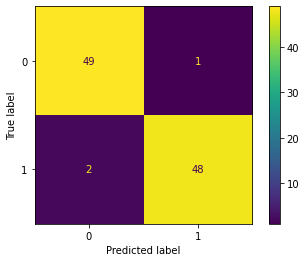

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_batches.classes, answers)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
